# Guided Project: Credit Card Customer Segmentation

## Table of Contents 
1. [Introduction](#introduction)
2. [Analyze the dataset](#analyze-data)
3. [Prepare the data for modelling](#prepare-data)
4. [Find an appropriate number of clusters](#find-clusters)
5. [Segment the data](#segment-data)
6. [Interpret and explain the results ](#interpret-results)

## Introduction <a name="introduction"></a>

This is a project I completed based on a guide called "Credit Card Customer Segmentation" on the Dataquest learning platform. 

In this project I have learned new skills related to unsupervised machine learning, specifically clustering, using scikit learn 

The implementation is written in Python, and is shown in Jupyter Notebooks.

![.jpg](img/cccsegment/4870599_49778_small.jpg)

Source: [Image by studiogstock on Freepik](https://www.freepik.com/free-vector/business-growth-money-savings_4870599.htm#fromView=search&page=1&position=55&uuid=e584fd9a-e0ae-4f63-b6c3-49591275a1a8)

### Goal of this project

Our objective is to leverage data science techniques to segment clients of a credit card company based on their behavior and demographics. By using the K-means algorithm on a  dataset, we aim to identify distinct customer groups. These segments will assist in providing tailored business strategies, such as adjusting credit limits and offering targeted incentives. This project aims to optimize business operations and enhance customer satisfaction.

### Required steps
In order to achieve the goals, we'll go through the following steps:

1. Analyze the dataset
2. Prepare the data for modeling
3. Find an appropriate number of clusters
4. Segment the data
5. Interpret and explain the results

## 1. Analyze the dataset <a name="analyze-data"></a>

### Import the dependencies
First we need to import the required libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

### Load and explore the data
The customers' credit card data are stored in 1 file called customer_segmentation.csv

In [2]:
# load files into dataframes
customers = pd.read_csv("data/cccsegment/customer_segmentation.csv")

In [3]:
# explore the dataset columns, size, data types
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               10127 non-null  int64  
 1   age                       10127 non-null  int64  
 2   gender                    10127 non-null  object 
 3   dependent_count           10127 non-null  int64  
 4   education_level           10127 non-null  object 
 5   marital_status            10127 non-null  object 
 6   estimated_income          10127 non-null  int64  
 7   months_on_book            10127 non-null  int64  
 8   total_relationship_count  10127 non-null  int64  
 9   months_inactive_12_mon    10127 non-null  int64  
 10  credit_limit              10127 non-null  float64
 11  total_trans_amount        10127 non-null  int64  
 12  total_trans_count         10127 non-null  int64  
 13  avg_utilization_ratio     10127 non-null  float64
dtypes: flo

In [4]:
# explore the customers data examples
customers.head()

,customer_id,age,gender,dependent_count,education_level,marital_status,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
0,768805383,45,M,3,High School,Married,69000,39,5,1,12691.0,1144,42,0.061
1,818770008,49,F,5,Graduate,Single,24000,44,6,1,8256.0,1291,33,0.105
2,713982108,51,M,3,Graduate,Married,93000,36,4,1,3418.0,1887,20,0.000
3,769911858,40,F,4,High School,Unknown,37000,34,3,4,3313.0,1171,20,0.760
4,709106358,40,M,3,Uneducated,Married,65000,21,5,1,4716.0,816,28,0.000


### Observations
Some initial observations about the customers data set

#### Data dictionary

- `customer_id`: unique identifier for each customer.
- `age`: customer age in years.
- `gender`: customer gender (M or F).
- `dependent_count`: number of dependents of each customer.
- `education_level`: level of education ("High School", "Graduate", etc.).
- `marital_status`: marital status ("Single", "Married", etc.).
- `estimated_income`: the estimated income for the customer projected by the data science team.
- `months_on_book`: time as a customer in months.
- `total_relationship_count`: number of times the customer contacted the company.
- `months_inactive_12_mon`: number of months the customer did not use the credit card in the last 12 months.
- `credit_limit`: customer's credit limit.
- `total_trans_amount`: the overall amount of money spent on the card by the customer.
- `total_trans_count`: the overall number of times the customer used the card.
- `avg_utilization_ratio`: daily average utilization ratio.

#### Other observations
1. There appear to be no empty values in the entire data set
2. The `gender`, `education_level` and `marital_status` columns are categorical, so we'll have to encode them later for our analysis.
3. Its already clear that we won't need `customer_id` for analysis. All the other columns could be required for analyis.

#### Visual observations
For a visual aspects of what we observe in the data, we'll use:
1. A correlation between the columns
2. A distribution of each numeric column

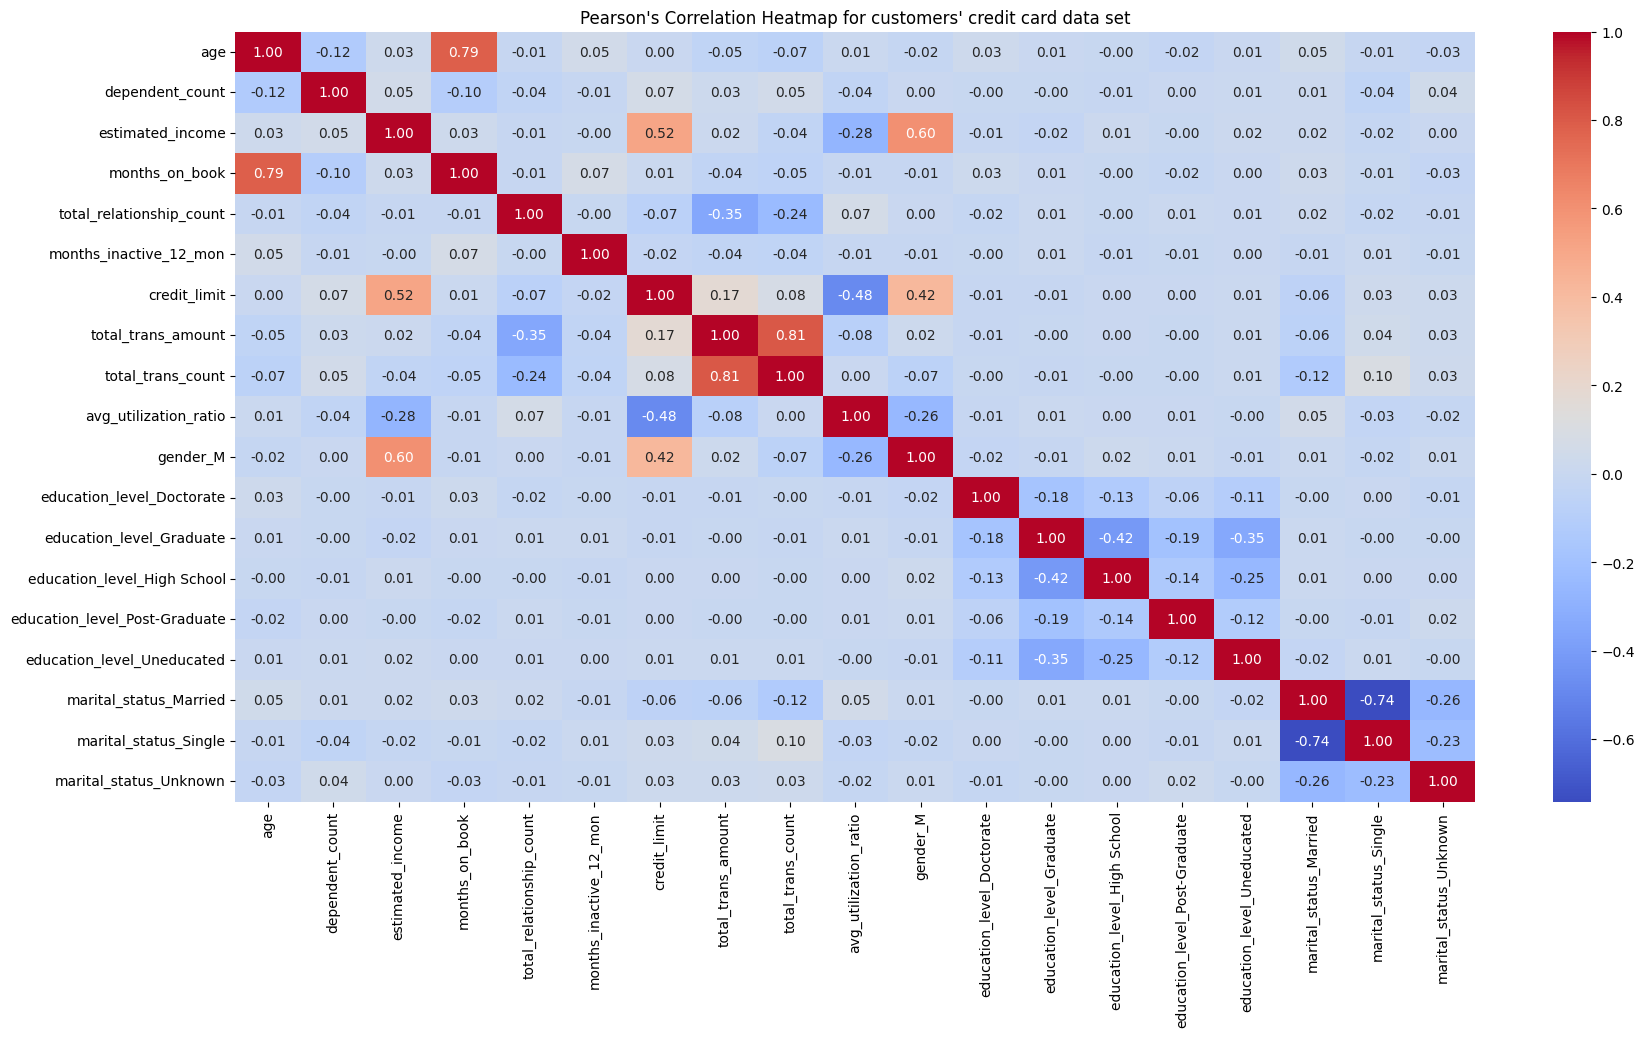

In [5]:
# Remove the customer_id column as its not needed.
customers = customers.drop(columns='customer_id')

# Create a copy of the dataframe
customers_dummies = customers.copy()

# Encode the categorical columns by creating dummy variables and preview the first 5 rows
customers_dummies = pd.get_dummies(customers_dummies, drop_first=True)
customers_dummies.head()

# Calculate Pearson's correlation coefficient
correlation_matrix = customers_dummies.corr()

# Generate a heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Pearson's Correlation Heatmap for customers' credit card data set")
plt.show()

Here are some observed strong correlations between columns from above:
- `age` with `months_on_book`. This makes sense as its likely that older customers have been clients for longer.
- `gender` with `estimated_income` and `credit_limit`. Also makes sense as its displays known gender inequality when it comes to compensation and resulting credit score.
- `total_trans_count` with `total_trans_amount`. Also makes sense as the more number of transactions with the client, the more likely the total amount.
- `avg_utilization_ratio` with `credit_limit`. There is a medium strong correlation, which makes sense as a higher credit limit will encourage more use. 

### Distributions of values of the Customers Credit Card data set

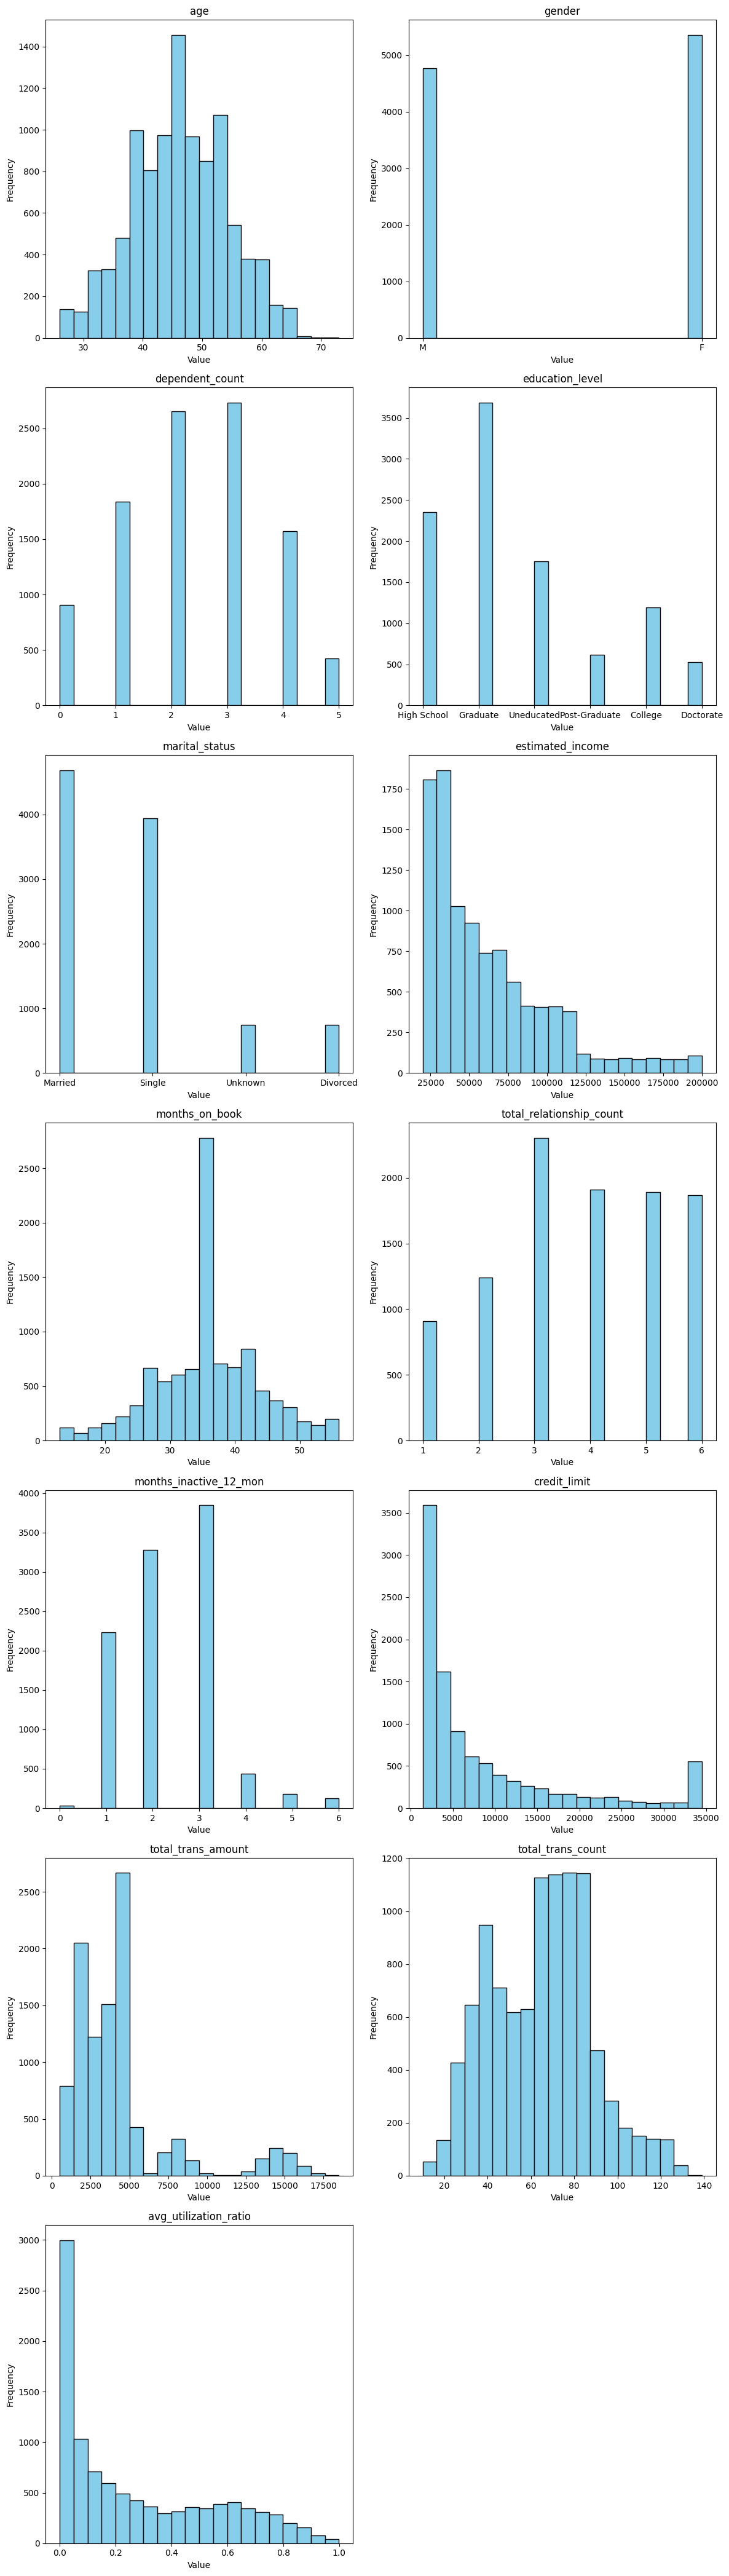

In [6]:
# Plot distributions of each column's values
def plot_histograms(df):
    num_cols = df.shape[1]
    num_rows = (num_cols + 1) // 2  # Number of rows for subplots
    
    fig, axes = plt.subplots(num_rows, 2, figsize=(12, 6*num_rows))
    axes = axes.flatten()

    for i, col in enumerate(df.columns):
        ax = axes[i]
        ax.hist(df[col], bins=20, color='skyblue', edgecolor='black')
        ax.set_title(col)
        ax.set_xlabel('Value')
        ax.set_ylabel('Frequency')
    
    # If the number of columns is odd, remove the empty subplot
    if num_cols % 2 != 0:
        fig.delaxes(axes[num_cols])

    plt.tight_layout()
    plt.show()

# Call the function on the customer dataframe, without the 'customer_id' column
plot_histograms(customers)

Here are some comments to noteworthy observations to the distributions of values of the data set:
- `age`:  there is a good distribution between young and old clients, although most are in the 40-50 years old range
- `gender`: females are slightly more resprented than males
- `estimated_income` and `credit_limit`: by far, most customers are in the lower income range, which reflects too on the `credit_limit`as commented before
- `months_on_book` shows a large outlier for the number 34. Perhaps this is the point in time when the company started onboarding customers?
- `utilisation_ratio` is mostly represented by low-usage customers, with a slight increase between 50%-70% usage customers
- `total_trans_count` and `total_trans_count` are both skewed to the right (positively skewed), indicating that there is less representation with higher values.

These observations may help us to decide which segments to focus efforts on more marketing.

## 2. Prepare the data for modeling <a name="prepare-data"></a>

### Categorical columns
Change the categorical columns to numeric values as defined.

In [7]:
# Create a copy of the original DataFrame.
customers_features = customers.copy()

In [8]:
# Replace the values in the gender column with 1 for "M" and 0 for "F".
customers_features['gender'] = customers_features['gender'].apply(lambda x: 1 if x=='M' else 0)

In [9]:
# Replace the values in the education_level column in the order below. 
# Uneducated - 0
# High School - 1
# College - 2
# Graduate - 3
# Post-Graduate - 4
# Doctorate - 5

education_levels_dict = {'Uneducated':  0, 
                   'High School': 1,
                    'College': 2,
                    'Graduate': 3,
                    'Post-Graduate' : 4,
                    'Doctorate' : 5
}

customers_features['education_level'] = customers_features['education_level'].map(education_levels_dict)


In [10]:
# Use one-hot-encoding to create dummy variables from the 'marital_status' column in a new dataframe.
customers_marit_status = customers_features.copy()
customers_marit_status = customers_marit_status['marital_status']
customers_marit_status = pd.get_dummies(customers_marit_status, prefix='marit_stat', drop_first=True)
customers_marit_status

# Add new and remove old column
customers_features_joined = customers_features.copy()
customers_features_joined = customers_features.join(customers_marit_status)
customers_features_joined = customers_features_joined.drop(columns='marital_status')

# Preview the results of the new marital status columns
customers_features_joined[['marit_stat_Married','marit_stat_Single','marit_stat_Unknown']].head()

,marit_stat_Married,marit_stat_Single,marit_stat_Unknown
0,True,False,False
1,False,True,False
2,True,False,False
3,False,False,True
4,True,False,False


In [11]:
# Preview the results
print(customers_features_joined['gender'].value_counts())
print(customers_features_joined['education_level'].value_counts().sort_index())
print(customers_features_joined['marit_stat_Married'].value_counts())
print(customers_features_joined['marit_stat_Single'].value_counts())
print(customers_features_joined['marit_stat_Unknown'].value_counts())

gender
0    5358
1    4769
Name: count, dtype: int64
education_level
0    1755
1    2351
2    1192
3    3685
4     616
5     528
Name: count, dtype: int64
marit_stat_Married
False    5440
True     4687
Name: count, dtype: int64
marit_stat_Single
False    6184
True     3943
Name: count, dtype: int64
marit_stat_Unknown
False    9378
True      749
Name: count, dtype: int64


### Scaling the data
We need to transform the data so it's all on the same scale.

In [12]:
#  Create a a copy for the final feature-engineered dataframe, before training the model
X = customers_features_joined.copy()

# Instantiate an object from the scikit-learn's StandardScaler() class and fit the new DataFrame
scaler = StandardScaler()
scaler.fit(X)

# Use the transform method to scale the data. Assign it to a different variable and print it
X_scaled = scaler.transform(X)
X_scaled
 
# Transform the scaler array back to a DataFrame using pd.DataFrame()
X = pd.DataFrame(X_scaled)
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-0.165406,1.059956,0.503368,-0.752211,0.175810,0.384621,0.763943,-1.327136,0.446622,-0.959707,-0.973895,-0.775882,1.077338,-0.798507,-0.282609
1,0.333570,-0.943436,2.043199,0.662787,-0.967166,1.010715,1.407306,-1.327136,-0.041367,-0.916433,-1.357340,-0.616276,-0.928214,1.252337,-0.282609
2,0.583058,1.059956,0.503368,0.662787,0.785397,0.008965,0.120579,-1.327136,-0.573698,-0.740982,-1.911206,-0.997155,1.077338,-0.798507,-0.282609
3,-0.789126,-0.943436,1.273283,-0.752211,-0.636973,-0.241473,-0.522785,1.641478,-0.585251,-0.951758,-1.911206,1.759686,-0.928214,-0.798507,3.538459
4,-0.789126,1.059956,0.503368,-1.459710,0.074212,-1.869317,0.763943,-1.327136,-0.430877,-1.056263,-1.570365,-0.997155,1.077338,-0.798507,-0.282609


## 3. Find an appropriate number of clusters <a name="find-clusters"></a>

### Choosing K
Our dataset is ready for machine learning. The next step is to decide the best number of clusters to use in the segmentation according to the inertia metric.

We'll have to create several models and compute the inertia from each of them. Then, we'll be able to plot the Elbow Curve and decide the number of clusters we'll use to segment the customers. Once we do all that, we can perform the real clusterization.

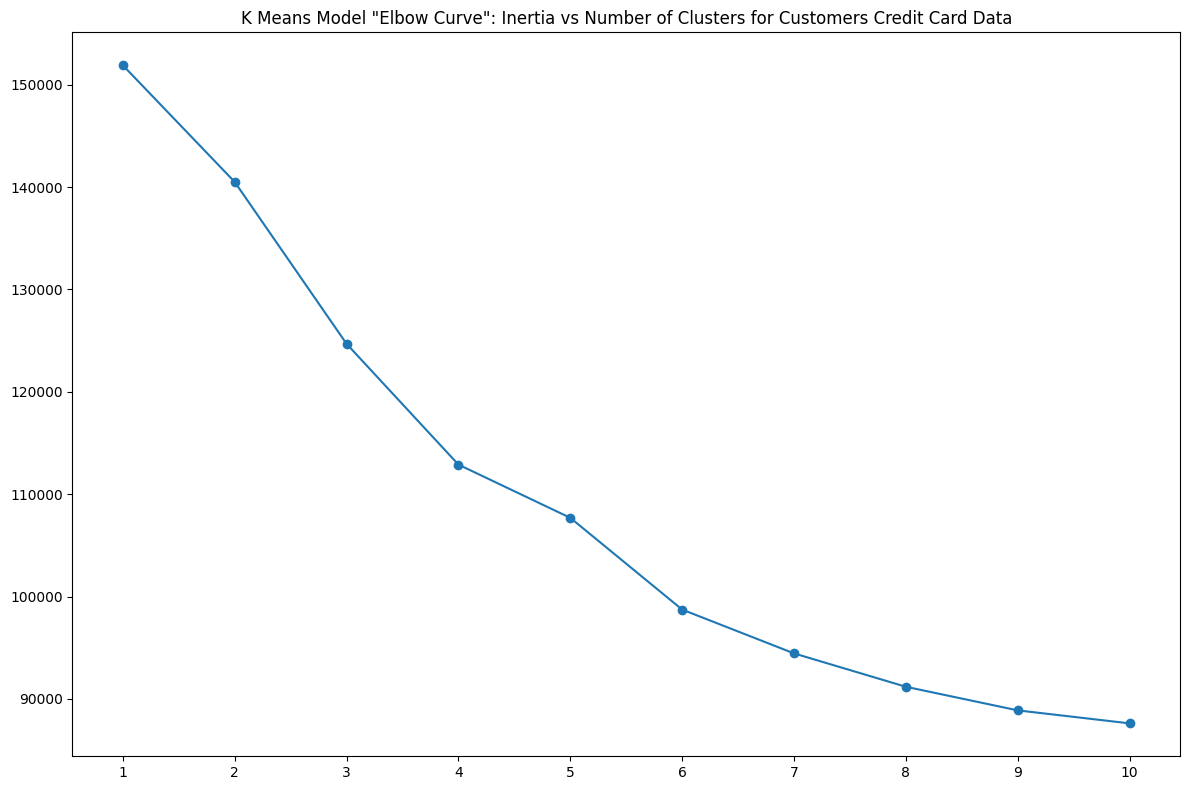

In [13]:
# Create an empty list to store the inertia from every model
inertias = []

# Use a for loop to the following process for different numbers of K. Loop in a range from 1 to 10, for example
# For each K in the loop:
    # Instantiate a Kmeans object setting n_clusters=k
    # Use fit_predict() to create clusters
    # Append the inertia_ attribute of the model to the empty list
for i in range(1,11):
    model = KMeans(n_clusters=i, random_state=10)
    cluster = model.fit_predict(X)
    inertias.append(model.inertia_)

# Use the list to plot the elbow curve. Decide how many clusters to use and explain this decision
plt.figure(figsize=(12, 8))
plt.plot(range(1, 11), inertias, marker='o')
plt.xticks(ticks=range(1, 11), labels=range(1, 11))
plt.title('K Means Model "Elbow Curve": Inertia vs Number of Clusters for Customers Credit Card Data')
plt.tight_layout()
plt.show()

It looks like from number of clusters equal to 6, the inertia is constantly decreasing. Therefore we choose this number to continue 

#### Observations

In [14]:
# Instantiate a new Kmeans object, but this time use the decided number of clusters as K
model = KMeans(n_clusters=6, random_state=10)

# fit_predict the data and print the outcome
y = model.fit_predict(X)
print(y)

[2 3 2 ... 1 0 1]


## 4. Segment the data <a name="segment-data"></a>

We need to see how the variables used in the clusterization differ from cluster to cluster in order better explain what each cluster represents.

In [15]:
# Create a new column called CLUSTER in the original customers DataFrame.
# This column should contain the cluster assigned to each customer by the algorithm.
customers['CLUSTER'] = y + 1
customers.head()

,age,gender,dependent_count,education_level,marital_status,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio,CLUSTER
0,45,M,3,High School,Married,69000,39,5,1,12691.0,1144,42,0.061,3
1,49,F,5,Graduate,Single,24000,44,6,1,8256.0,1291,33,0.105,4
2,51,M,3,Graduate,Married,93000,36,4,1,3418.0,1887,20,0.000,3
3,40,F,4,High School,Unknown,37000,34,3,4,3313.0,1171,20,0.760,1
4,40,M,3,Uneducated,Married,65000,21,5,1,4716.0,816,28,0.000,2


### Group by numeric variables and display charts

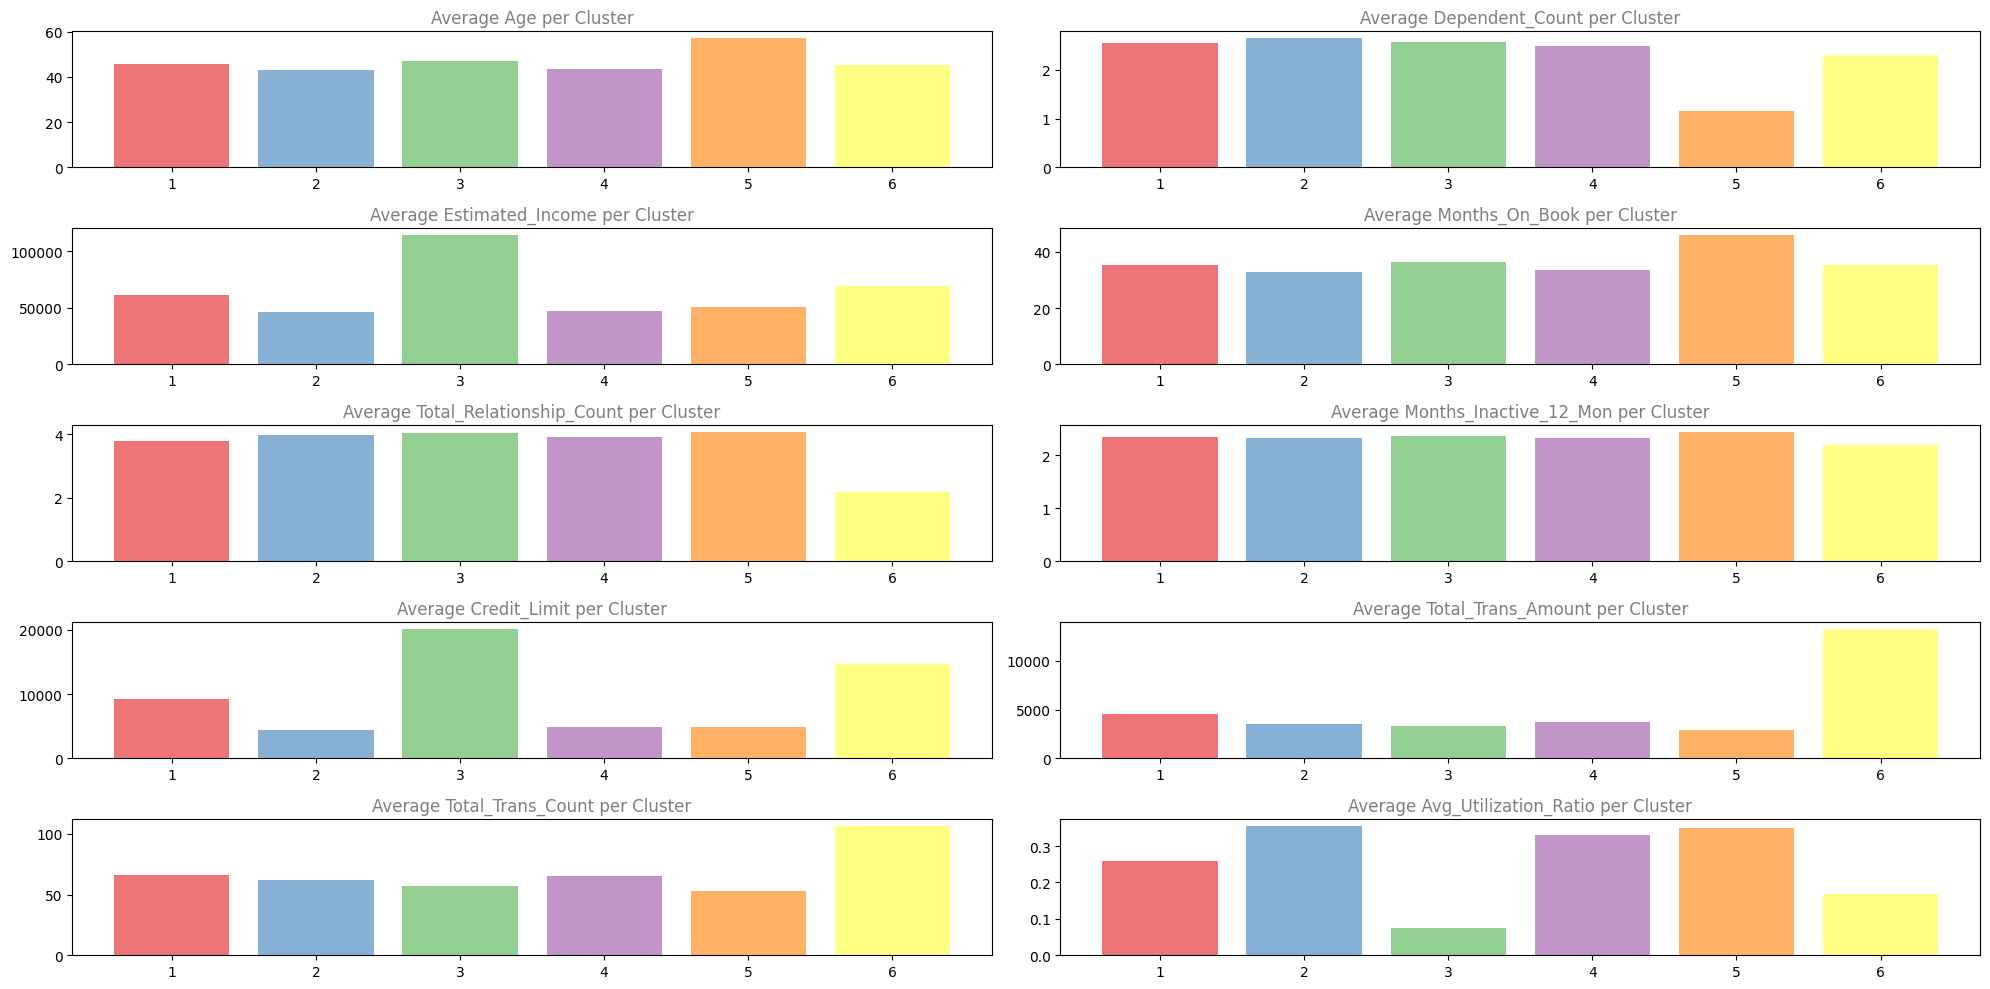

In [16]:
# Group each numeric variable by the CLUSTER column and plot a bar chart.
# Analyze the clusters' characteristics regarding each variable. Explain the conclusions.

numeric_columns = ['age', 'dependent_count', 'estimated_income', 'months_on_book', 
                   'total_relationship_count', 'months_inactive_12_mon', 'credit_limit', 
                   'total_trans_amount', 'total_trans_count', 'avg_utilization_ratio']

fig = plt.figure(figsize=(20, 10))
for i, c in enumerate(numeric_columns):
    df_plot = customers.groupby('CLUSTER')[c].mean()
    ax = fig.add_subplot(5, 2, i+1)
    ax.bar(df_plot.index, df_plot, color=sns.color_palette('Set1'), alpha=0.6)
    ax.set_title(f'Average {c.title()} per Cluster', alpha=0.5)
    ax.xaxis.grid(False)
    
plt.tight_layout()
plt.show()

#### Conclusions about clusters for numeric variables
- Age: all clusters have an average age around 40, except cluster 5 which is the highest with close to 60.
- Dependent Count: Most clusters are 2-2.5, except cluster 5 which is only 1.
- Estimated Income: Cluster 3 has the highest with over 100'000.
- Months on Book: Most clusters are 30-35, except cluster 5 which is just under 50.
- Total Relationship Count: all clusters have an average TRC close to 4, except cluster 6 which is the lowest with about 2.
- Months Inactive 12 Mon: all clusters are around 2 on average.
- Credit Limit: Clusters 2 and 6 stand out here with values of about 200'000 and 150'000 respectively.
- Total Trans Amount: Most clusters are around 30'000-50'000, except cluster 6 which is about 150'000.
- Total Trans Count: Most clusters are around 50, except cluster 6 which is about 100.
- Utilization Ratio: Clusters 3 (significantly) and cluster 6 are lower than the rest of the clusters, which are at around 0.3.

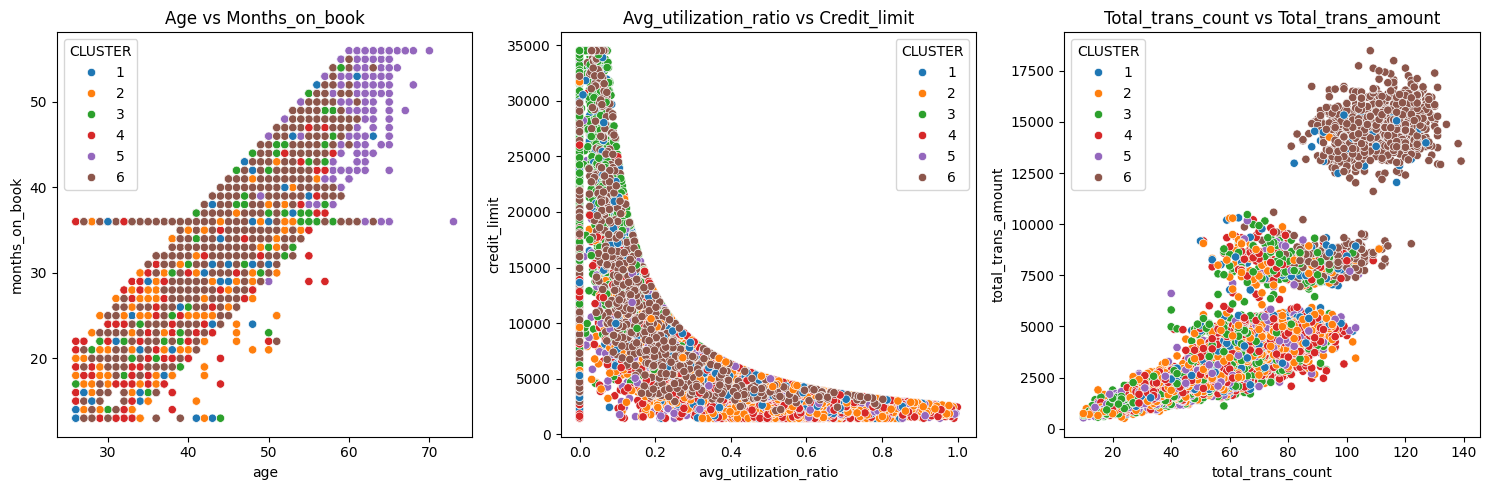

In [17]:
# Create a scatter plot with different colors for each cluster of pairs of variables with a high correlation. 
# Use seaborn.scatterplot() function with the hue parameter.

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Scatterplot age vs months_on_book
sns.scatterplot(x='age', y='months_on_book', data=customers, ax=axes[0], hue=customers['CLUSTER'], palette='tab10')
axes[0].set_title('Age vs Months_on_book')

# Scatterplot avg_utilization_ratio vs credit_limit
sns.scatterplot(x='avg_utilization_ratio', y='credit_limit', data=customers, ax=axes[1], hue=customers['CLUSTER'], palette='tab10')
axes[1].set_title('Avg_utilization_ratio vs Credit_limit')

# # Scatterplot gender vs estimated_income
# sns.scatterplot(x='gender', y='estimated_income', data=customers, ax=axes[0, 1], hue=customers['CLUSTER'], palette='tab10')
# axes[0, 1].set_title('gender vs estimated_income')

# # Scatterplot gender vs credit_limit
# sns.scatterplot(x='gender', y='credit_limit', data=customers, ax=axes[1, 0], hue=customers['CLUSTER'], palette='tab10')
# axes[1, 0].set_title('gender vs credit_limit')

# Scatterplot total_trans_count vs total_trans_amount
sns.scatterplot(x='total_trans_count', y='total_trans_amount', data=customers, ax=axes[2], hue=customers['CLUSTER'], palette='tab10')
axes[2].set_title('Total_trans_count vs Total_trans_amount')

plt.tight_layout()
plt.show()

#### Conclusions about highly correlated numeric variables
-  `age` over `months_on_book` at first glance shows a very strong positive linear association across all clusters. However, cluster 5, which are customers aged over 50 and more than 35 months on book appear to be closest in their association 
- `avg_utilization_ratio` over `credit_limit` interestingly shows a strong negative non-linear association not only across all clusters, but by cluster as well. There is also a linear association when the ration is 0, which makes sense as customers have different credit limits but have never used their credit cards. 
- `total_trans_count` over `total_trans_amount` shows what looks like a positive non-linear associate across all clusters, but what's interesting is cluster 6 which indicates customer who make more transactions also have a higher total transaction amount. 

### Group by categorical variables and display chart

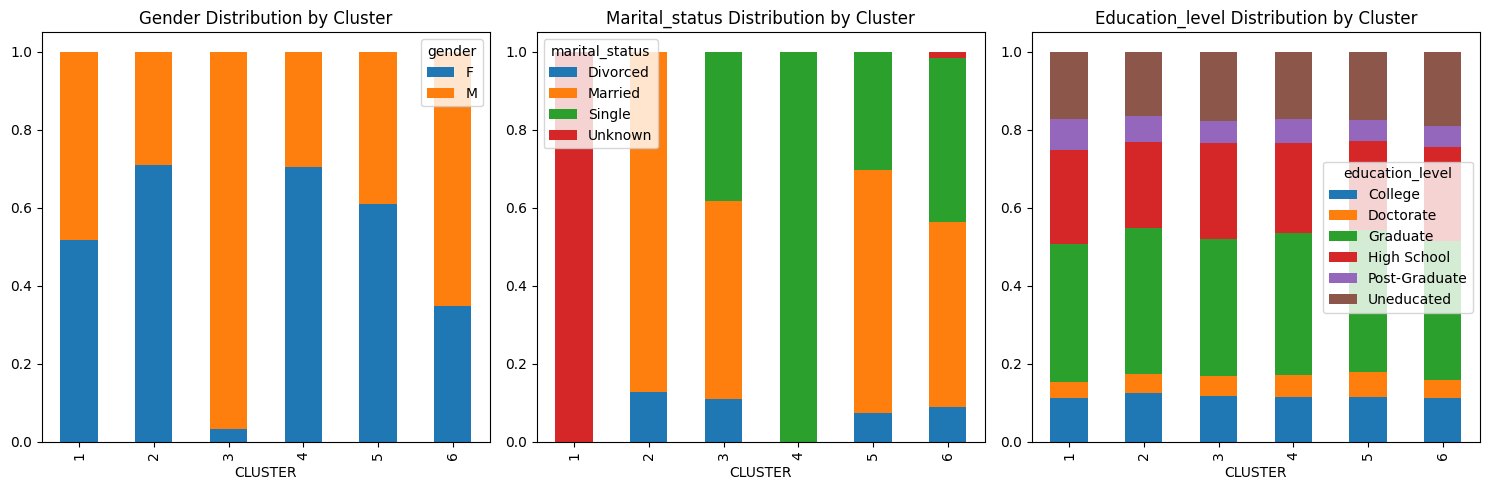

In [18]:
categorical_columns = ['gender', 'marital_status', 'education_level']

fig, axes = plt.subplots(1, len(categorical_columns), figsize=(15, 5))

for i, category in enumerate(categorical_columns):
	# Define crosstab for each categorical columns
	category_cluster_crosstab = pd.crosstab(
	index=customers['CLUSTER'],
	columns=customers[category],
	values=customers[category],
	aggfunc='size',
	normalize='index'
	)
	# Set the plot properties for each categorical columns
	category_cluster_crosstab.plot.bar(stacked=True, ax=axes[i])
	axes[i].set_title(f'{category.capitalize()} Distribution by Cluster')

plt.tight_layout()
plt.show()

#### Conclusions about clusters for categorical variables
- Gender: Clusters 3 and 6 are consisting mainly of males, whereas the rest are mostly females
- Marital status.: Cluster 1 is completely unknown, whereas cluster 4 is completely single, and cluster 2 is only divorced or married.
- Education level: There seems to be not much difference between the composition of the clusters. 

## 5. Interpret and explain the results <a name="interpret-results"></a>

- Cluster 1
    - Characteristics: gender well divided, but marital status completely unknown, average income, 2 dependents, average credit limit and utilization ratio.
    - Business insights: this is a quite general cluster, no suggestions to change anything here.
- Cluster 2
    - Characteristics: mostly married women, more than 2 dependents, lower income, low credit limit with high utilization, high number of transactions with fairly low total amount.
    - Business insights: could increase credit limit slightly to possibly increase spending amount
- Cluster 3
    - Characteristics: mostly married or single men, high income, high credit limit, low utilization
    - Business insights: this cluster probably presents the biggest opportunity to incentivise customers to increase their spending
- Cluster 4
    - Characteristics: mostly single women, about 2 dependents, low income, low credit limit with high utilization
    - Business insights: similar to cluster 2, could increase credit limit slightly to possibly increase spending amount
- Cluster 5
    - Characteristics: high age, gender well divided, mostly married but also singles and divorced, average income, low number of dependents, low credit limit and high utilization ratio.
    - Business insights: could be older couples or older singles, they may have larger disposable income. Aim to increase credit limit slightly to possibly increase spending amount.
- Cluster 6
    - Characteristics: mostly married or single men, low number of dependents, high total amount, medium credit limit, low utilization ratio, high transaction amount.
    - Business insights: could be couples without children or only 1 child, or single men, who spend much at a time. Incentivize to use the card more.